In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('X_train.csv', sep=';')
X_val = pd.read_csv('X_val.csv', sep=';')
Y_train = pd.read_csv('Y_train.csv', sep=';', header=None)

In [3]:
X_train['id'] = X_train['Unnamed: 0']
X_val['id'] = X_val['Unnamed: 0']
X_train = X_train.drop(columns='Unnamed: 0')
X_val = X_val.drop(columns='Unnamed: 0')

Y_train['id'] = Y_train[0]
Y_train['target'] = Y_train[1]
Y_train = Y_train.drop(columns=[0])
Y_train = Y_train.drop(columns=[1])

In [4]:
X_train.head(8)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,id
0,102.859375,38.363951,0.233042,1.045250,14.140468,45.608176,3.183349,8.934704,17536
1,105.101562,56.161158,0.229232,-0.509626,2.681438,19.451071,9.076628,90.795092,14173
2,111.179688,50.565155,0.339628,0.111809,3.593645,22.040486,7.884235,68.629714,11357
3,92.250000,34.671674,0.733480,2.800216,1.997492,11.533034,11.652598,206.559295,17274
4,190.421875,59.106447,-1.517159,1.497580,95.719900,97.754509,0.058366,-1.964998,3152
5,11.312500,32.899171,5.965439,35.985232,118.633779,67.351047,0.021561,-0.574656,8251
6,92.453125,42.491517,0.627212,1.150733,3.571906,18.333332,6.855620,57.715133,17592
7,83.226562,36.142343,0.490059,2.625865,4.956522,27.455950,6.400356,43.590517,17600


In [5]:
Y_train.head(8)

,id,target
0,17536,0
1,14173,0
2,11357,0
3,17274,0
4,3152,0
5,8251,1
6,17592,0
7,17600,0


In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, Y_train['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [9]:
from sklearn.metrics import classification_report

print(classification_report(Y_train['target'], knn.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [10]:
from sklearn import preprocessing
# normalize the data attributes
normalized_X = preprocessing.normalize(X_train)
# standardize the data attributes
standardized_X = preprocessing.scale(X_train)

In [12]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, Y_train['target'])
# display the relative importance of each attribute
print(model.feature_importances_)

[0.35714286 0.01428571 0.2        0.23333333 0.08571429 0.04285714
 0.02380952 0.         0.04285714]


/home/lucius/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X_train, Y_train['target'])
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True False False  True False]
[1 3 6 2 1 4 5 1 7]


/home/lucius/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucius/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucius/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucius/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucius/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

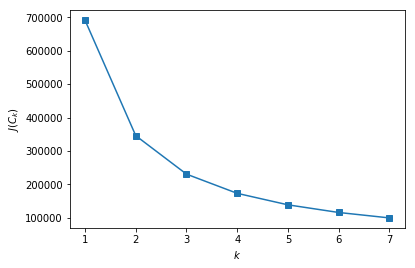

In [27]:
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm

inertia = []
for k in tqdm(range(1, 8)):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_val)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [29]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(X_val)
print(classification_report(Y_train['target'], kmeans.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.50      1.00      0.67         1

    accuracy                           0.88         8
   macro avg       0.75      0.93      0.79         8
weighted avg       0.94      0.88      0.89         8



### Save to CSV 

In [33]:
data_final = kmeans.predict(X_val)

In [34]:
len(data_final)

17890

In [35]:
X_val.head(2)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,id
0,102.437500,50.479846,0.701819,0.222519,3.234114,20.875936,8.623847,80.173947,2184
1,132.054688,46.930685,0.176822,-0.122368,0.989130,10.005553,17.276922,379.483577,540


In [36]:
final_dataframe = pd.DataFrame(data_final.T, index = X_val.id)
final_dataframe.columns = ['prediction']
final_dataframe.head(1)

,prediction
id,
2184,1


In [37]:
final_dataframe.to_csv('Celestial_body_23.05.2019_04:05.csv', index='False')
final_dataframe.head()

,prediction
id,
2184,1
540,1
261,1
8100,1
14831,0
